In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
# load SNN the noise dataset
snn_res = np.load("results/noise_exp_06_36_08.npz")
rc_res = snn_res["rc_res"]
svm_res = snn_res["svm_res"]

In [7]:
rc_acc = np.array(rc_res.item()['acc'])
svm_acc = np.array(svm_res.item()['acc'])
rc_acc - svm_acc

array([ 0.5 ,  0.5 ,  0.75,  0.75,  0.  ,  0.5 ,  0.75,  0.75,  0.5 ,
        0.5 ,  0.  ,  0.  ,  0.5 ,  0.5 ,  0.5 ,  0.75,  0.5 ,  0.  ,
        0.5 ,  0.5 ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.25,
        0.  ,  0.  ,  0.25,  0.5 ,  0.5 ,  0.5 ,  0.75,  0.75,  0.75,
        0.75,  0.75,  0.75,  0.75,  0.75,  0.5 ,  0.75,  0.5 ,  0.5 ,
        0.25,  0.75,  0.5 ,  0.75,  0.25,  0.5 ,  0.25,  0.25,  0.  ,
        0.25,  0.  ,  0.  ,  0.25, -0.25,  0.25,  0.25,  0.5 ,  0.25,
        0.25,  0.25,  0.25,  0.  ,  0.25,  0.  ,  0.  ,  0.75,  0.5 ,
        0.5 ,  0.75,  0.75,  0.75,  0.5 ,  1.  ,  0.25,  0.5 ,  0.25,
        0.25,  0.25,  0.  ,  0.25,  0.25,  0.  ,  0.25,  0.25,  0.25])

In [5]:
# make a plot for each dataset, then one for all of them averaged together
# make that lmplot

In [111]:
# load the ANN dataset
ann_res = np.load("results/ann_noise_exp_06_17_52.npz")
ann_acc = ann_res['ann_res'].item()['acc']
print(ann_acc)

[0.75, 1.0, 0.75, 0.75, 0.75, 0.75, 1.0, 1.0, 1.0, 1.0, 0.75, 0.5, 0.75, 0.75, 0.5, 0.5, 0.5, 0.75, 0.5, 0.75, 0.75, 0.75, 0.5, 0.5, 0.75, 0.75, 0.75, 0.75, 0.75, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.75, 0.75, 1.0, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.5, 0.5, 0.5, 0.75, 0.5, 0.75, 0.5, 0.5, 0.75, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


In [23]:
# make the same plots

In [24]:
# try to put them side-by-side?

In [69]:
# get class-test results for LIF at the iteration 10 and 20
lif_res = np.load("results/class_exp_03_08_12.npz")
print(lif_res.keys())
sig_list = ["WhiteSignal Continuous", "Orthogonal Interpolation", "WhiteNoise Discrete"]
print(lif_res["class_nums"])
print(lif_res['exp_iter'])

['svm_res', 'class_nums', 'rc_res', 'exp_iter']
[ 3  5 10 20 40]
10


In [98]:
rc_acc = np.array(lif_res['rc_res'].item()['acc'])
# shape = sig_type, class_num, exp_iter 
rc_acc = rc_acc.reshape((-1, len(lif_res["class_nums"]), lif_res['exp_iter']))
n_list = lif_res["class_nums"]
print(rc_acc.shape)
new_rc = []
for sig in range(rc_acc.shape[0]):
    for n_cls in range(rc_acc.shape[1]):
        for run in range(rc_acc.shape[2]):
            # data, label, label
            new_rc.append((rc_acc[sig, n_cls, run], sig_list[sig], n_list[n_cls], "LIF"))
            
df = pd.DataFrame(new_rc, columns=["Accuracy", "Signal Type", "Number of Classes", "Neuron Type"])

(3, 5, 10)


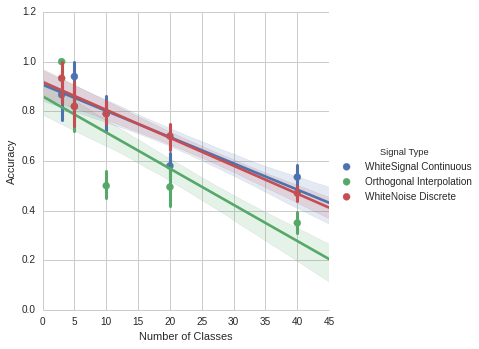

In [81]:
sns.lmplot("Number of Classes", "Accuracy", hue="Signal Type", data=df, x_estimator=np.mean)

In [34]:
def alif_frame(a_acc, n_type="Adaptive LIF"):
    tmp_alif = []
    for sig in range(a_acc.shape[0]):
        for n_cls in range(a_acc.shape[1]):
            for run in range(a_acc.shape[2]):
                # data, label, label
                tmp_alif.append((a_acc[sig, n_cls, run], sig_list[sig], n_list[n_cls], n_type))
    return tmp_alif

# get class-test results for ALIF
a_res = np.load("results/alif_final/alif_exp_1.npz")
a_acc = np.array(a_res['rc_res'].item()['acc'])
a_acc = a_acc.reshape((-1, len(a_res["class_nums"]), a_res['exp_iter']))
print(a_acc.shape)

sig_list = ["WhiteSignal Continuous", "Orthogonal Interpolation", "WhiteNoise Discrete"]
n_list = a_res["class_nums"]
frame = []

frame.extend(alif_frame(a_acc))

a_res = np.load("results/alif_final/no_alif_exp_1.npz")
a_acc = np.array(a_res['rc_res'].item()['acc'])
a_acc = a_acc.reshape((-1, len(a_res["class_nums"]), a_res['exp_iter']))
frame.extend(alif_frame(a_acc, n_type="LIF"))


rc_frame = pd.DataFrame(frame, columns=["Accuracy", "Signal Type", "Number of Classes", "Neuron Type"])

(3, 3, 10)


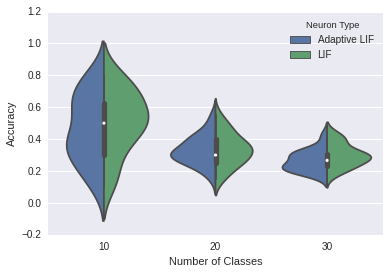

In [35]:
# plot them side-by-side somehow
sns.violinplot('Number of Classes', 'Accuracy', hue='Neuron Type', data=rc_frame, split=True, inner='box')

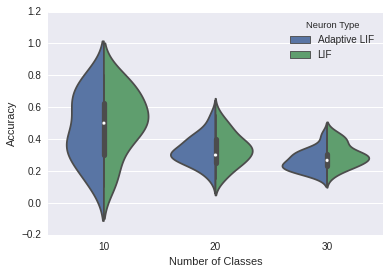

In [16]:
vio_frame = neuron_frame[(neuron_frame["Signal Type"] == "WhiteSignal Continuous")]
sns.violinplot('Number of Classes', 'Accuracy', hue='Neuron Type', data=vio_frame, split=True, inner='box')

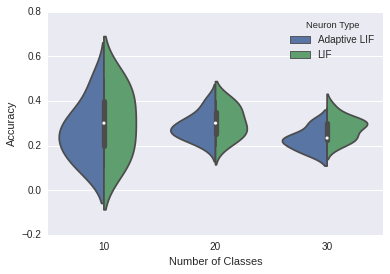

In [20]:
vio_frame = neuron_frame[(neuron_frame["Signal Type"] == "Orthogonal Interpolation")]
sns.violinplot('Number of Classes', 'Accuracy', hue='Neuron Type', data=vio_frame, split=True, inner='box')

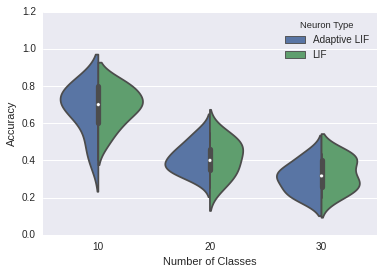

In [22]:
vio_frame = neuron_frame[(neuron_frame["Signal Type"] == "WhiteNoise Discrete")]
sns.violinplot('Number of Classes', 'Accuracy', hue='Neuron Type', data=vio_frame, split=True, inner='box')

In [28]:
# get class-test results for ALIF
a_res = np.load("results/alif_final/alif_exp.npz")
a_acc = np.array(a_res['svm_res'].item()['acc'])
a_acc = a_acc.reshape((-1, len(a_res["class_nums"]), a_res['exp_iter']))
print(a_acc.shape)

sig_list = ["WhiteSignal Continuous", "Orthogonal Interpolation", "WhiteNoise Discrete"]
n_list = a_res["class_nums"]
frame = []

frame.extend(alif_frame(a_acc))

a_res = np.load("results/alif_final/no_alif_exp.npz")
a_acc = np.array(a_res['svm_res'].item()['acc'])
a_acc = a_acc.reshape((-1, len(a_res["class_nums"]), a_res['exp_iter']))
frame.extend(alif_frame(a_acc, n_type="LIF"))


svm_frame = pd.DataFrame(frame, columns=["Accuracy", "Signal Type", "Number of Classes", "Neuron Type"])

(3, 3, 10)


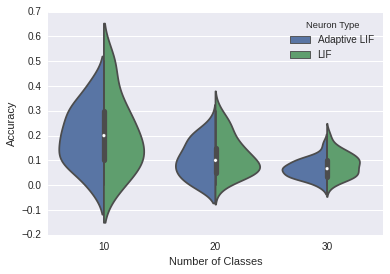

In [29]:
sns.violinplot('Number of Classes', 'Accuracy', hue='Neuron Type', data=svm_frame, split=True, inner='box')

In [ ]:
# compare the expected benefits of combining the two populations vs. the actual benefits